In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

In [ ]:
cd /content/drive/"MyDrive/Colab Notebooks/"

In [ ]:
data2 = pd.read_csv('2010-2011.csv')

In [ ]:
data2

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
0,E0,14/08/10,Aston Villa,West Ham,3,0,H,2,0,H,...,2.11,2.01,1.82,1.75,20,0.00,1.45,1.40,3.00,2.78
1,E0,14/08/10,Blackburn,Everton,1,0,H,1,0,H,...,2.20,2.08,1.79,1.70,29,0.00,2.20,2.05,1.85,1.75
2,E0,14/08/10,Bolton,Fulham,0,0,D,0,0,D,...,2.22,2.09,1.75,1.69,24,0.00,1.60,1.55,2.56,2.36
3,E0,14/08/10,Chelsea,West Brom,6,0,H,2,0,H,...,1.53,1.49,2.61,2.49,19,-2.00,2.06,2.01,1.91,1.85
4,E0,14/08/10,Sunderland,Birmingham,2,2,D,1,0,H,...,2.28,2.16,1.71,1.65,24,0.00,1.64,1.55,2.50,2.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,22/05/11,Newcastle,West Brom,3,3,D,2,0,H,...,1.72,1.67,2.27,2.13,20,-0.50,2.13,2.09,1.84,1.81
376,E0,22/05/11,Stoke,Wigan,0,1,A,0,0,D,...,1.98,1.90,1.95,1.88,27,0.00,2.10,2.00,1.93,1.85
377,E0,22/05/11,Tottenham,Birmingham,2,1,H,0,0,D,...,1.68,1.61,2.38,2.23,22,-1.00,1.93,1.89,2.03,1.99
378,E0,22/05/11,West Ham,Sunderland,0,3,A,0,1,A,...,1.72,1.67,2.25,2.14,20,-0.50,2.05,1.98,1.94,1.91


In [ ]:
hs = data2['HS']

In [ ]:
hs

0      23
1       7
2      13
3      18
4       6
       ..
375    15
376    11
377    22
378    17
379    12
Name: HS, Length: 380, dtype: int64

In [ ]:
x = data2.iloc[:,11:23]

In [ ]:
x.insert(12,"FTR",data2.iloc[:,6],True)

In [ ]:
x

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,FTR
0,23,12,11,2,15,15,16,7,1,2,0,0,H
1,7,17,2,12,19,14,1,3,2,1,0,0,H
2,13,12,9,7,12,13,4,8,1,3,0,0,D
3,18,10,13,4,10,10,3,1,1,0,0,0,H
4,6,13,2,7,13,10,3,6,3,3,1,0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,15,13,10,7,5,8,7,6,0,0,0,0,D
376,11,11,5,9,10,9,5,3,1,4,0,0,A
377,22,7,16,3,5,15,7,5,0,3,0,0,H
378,17,17,12,12,7,8,4,6,0,2,0,0,A


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def cost(theta, x, y):
    h = sigmoid(x @ theta)
    m = len(y)
    cost = 1 / m * np.sum(
        -y * np.log(h) - (1 - y) * np.log(1 - h)
    )
    grad = 1 / m * ((y - h) @ x)
    return cost, grad

In [ ]:
def fit(x, y, max_iter=5000, alpha=0.1):
    x = np.insert(x, 0, 1, axis=1)
    thetas = []
    classes = np.unique(y)
    costs = np.zeros(max_iter)

    for c in classes:
        # one vs. rest binary classification
        binary_y = np.where(y == c, 1, 0)
        
        theta = np.zeros(x.shape[1])
        for epoch in range(max_iter):
            costs[epoch], grad = cost(theta, x, binary_y)
            theta += alpha * grad
            
        thetas.append(theta)
    return thetas, classes, costs


In [ ]:
def predict(classes, thetas, x):
    x = np.insert(x, 0, 1, axis=1)
    preds = [np.argmax(
        [sigmoid(xi @ theta) for theta in thetas]
    ) for xi in x]
    return [classes[p] for p in preds]


In [ ]:
x["FTR"] = x["FTR"].astype('category').cat.codes
data = np.array(x)
np.random.shuffle(data)

In [ ]:
num_train = int(.8 * len(data))  # 80/20 train/test split
x_train, y_train = data[:num_train, :-1], data[:num_train, -1]
x_test, y_test = data[num_train:, :-1], data[num_train:, -1]

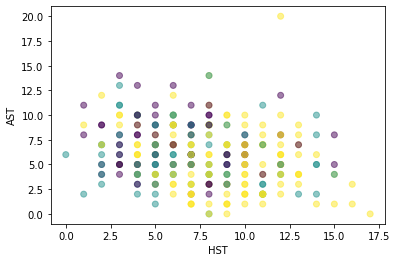

In [ ]:
plt.scatter(x_train[:,2], x_train[:, 3], c=y_train, alpha=0.5)
plt.xlabel("HST"); plt.ylabel("AST");

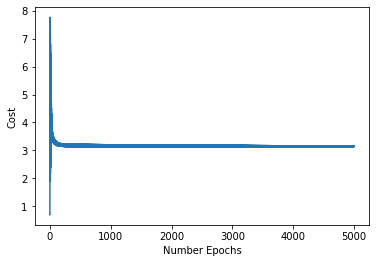

In [ ]:
thetas, classes, costs = fit(x_train[:, 2:], y_train)
plt.plot(costs)
plt.xlabel('Number Epochs'); plt.ylabel('Cost');

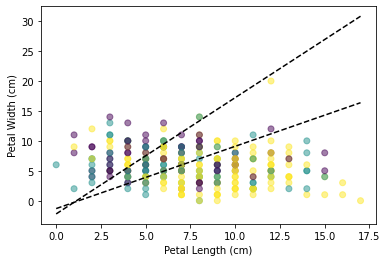

In [ ]:
plt.scatter(x_train[:,2], x_train[:, 3], c=y_train, alpha=0.5)
plt.xlabel("Petal Length (cm)"); plt.ylabel("Petal Width (cm)");
for theta in [thetas[0],thetas[2]]:
    j = np.array([x_train[:, 2].min(), x_train[:, 2].max()])
    k = -(j * theta[1] + theta[0]) / theta[2]
    plt.plot(j, k, color='k', linestyle="--")

In [ ]:
def score(classes, theta, x, y):
    return (predict(classes, theta, x) == y).mean()

In [ ]:
thetas, classes, costs = fit(x_train, y_train)
print(f"Train Accuracy: {score(classes, thetas, x_train, y_train):.3f}")
print(f"Test Accuracy: {score(classes, thetas, x_test, y_test):.3f}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


Train Accuracy: 0.520
Test Accuracy: 0.526
